In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE

df = pd.read_csv('/content/drive/MyDrive/EEG data/EEG_data.csv')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/EEG data/OneHotDataset.csv')
df.head()

,CSE_110,CSE_111,CSE_230,CSE_260,CSE_330,CSE_340,CSE_420,CSE_421,CSE_422,CSE_427,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,0,1,0,0,0,0,0,0,0,0,56,43,278,301963,90612,33735,23991,27946,45097,33228,8293,0
1,0,1,0,0,0,0,0,0,0,0,40,35,-50,73787,28083,1439,2240,2746,3687,5293,2740,0
2,0,1,0,0,0,0,0,0,0,0,47,48,101,758353,383745,201999,62107,36293,130536,57243,25354,0
3,0,1,0,0,0,0,0,0,0,0,47,57,-5,2012240,129350,61236,17084,11488,62462,49960,33932,0
4,0,1,0,0,0,0,0,0,0,0,44,53,-8,1005145,354328,37102,88881,45307,99603,44790,29749,0


In [4]:
X = df.drop('user-definedlabeln',axis=1).values
y = df['user-definedlabeln'].values

In [5]:
pt = PowerTransformer()
X_pt = pt.fit_transform(X)


Applyin t-SNE:


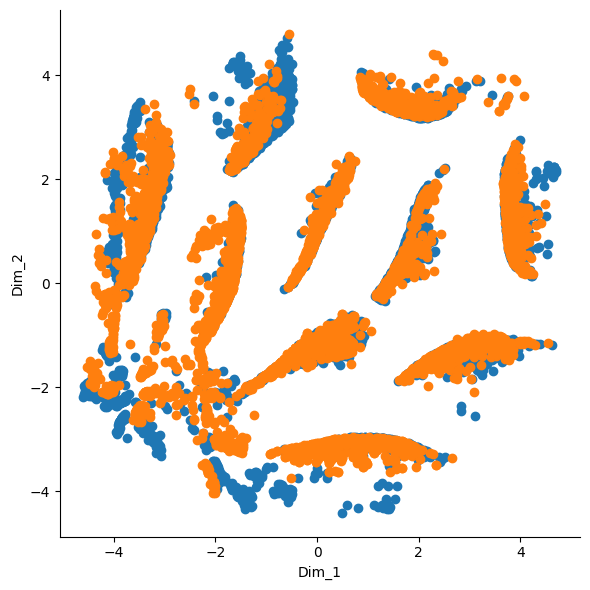

In [6]:
data = X_pt

labels = y

model = TSNE(n_components=2, random_state=0, perplexity=6000, n_iter=3000)

tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2')
plt.show()